# Face detection only, pre data agumentation

In [59]:
%load_ext autoreload
%autoreload 2

import ipynbname
import torch
import os
import warnings
import numpy as np
from xgboost import XGBClassifier
from libraries.classifier_utils import *
from libraries.embeddings_utils import *
from libraries.EmbeddingNet_utils import *
from libraries.retrieval_utils import *


project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/2.fd_weights/best.pt"

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cpu


In [60]:
emb_builder = EmbeddingBuilder(model_path_fd, image_dataset_path, "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 2 (YOLOv8)
Dataset: /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


In [61]:
embeddings = emb_builder.create_embedding(flags=True, positions=True, positions_normalized=True, geometric_info=True)
embeddings.head(10)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------


,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,-0.879900,-0.288420,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,1.824541
1,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
2,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
3,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
4,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
5,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
6,2.547919,4.058397,3.027583,-0.298416,2.441388,3.094326,3.870211,4.872499,2.881694,3.809597,...,-0.694785,-0.174258,3.756528,3.606858,-0.249989,-0.233531,-0.241117,3.818213,-0.107605,1.291366
7,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
8,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935
9,-0.392477,-0.246403,-0.330296,-0.298416,-0.388470,-0.386493,-0.244556,-0.243652,-0.326958,-0.327400,...,0.183360,0.224472,-0.245086,-0.232960,-0.249989,-0.233531,-0.241117,-0.214544,-0.107605,-0.613935



Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.40      0.54       437
 baby_unsafe       0.58      0.94      0.72       395

    accuracy                           0.65       832
   macro avg       0.73      0.67      0.63       832
weighted avg       0.74      0.65      0.63       832

Confusion matrix---------------------------------------


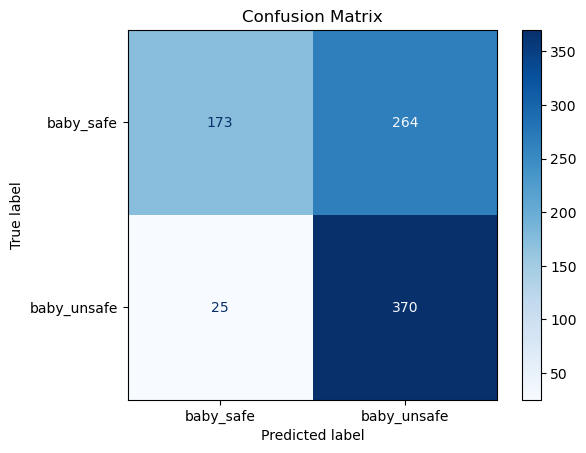

In [62]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)
clf.XGBC(shortAnalysis=True)

Precision at different k:-----------------------------------------------------------------


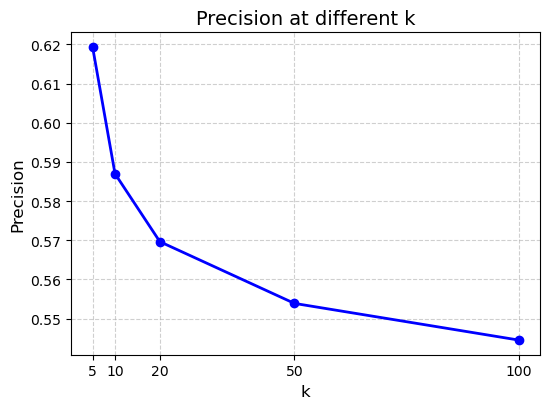


Recall at R-------------------------------------------------------------------------------
0.5081676757354469

Silhouette score--------------------------------------------------------------------------


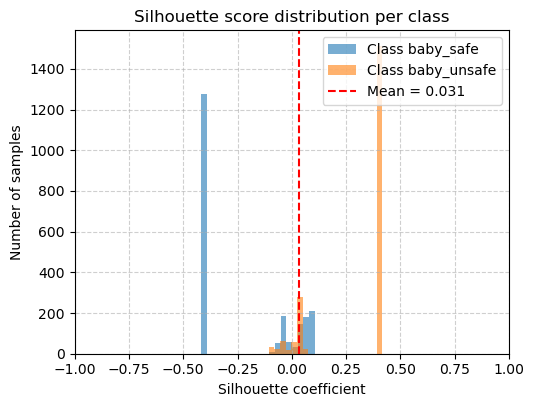

Silhouette score (euclidean): 0.031

Embeddings distributions------------------------------------------------------------------


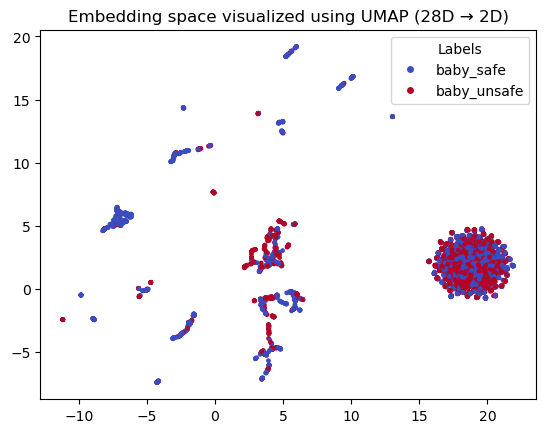

In [63]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

# Face detection only, post data agumentation

In [64]:
%load_ext autoreload
%autoreload 2

import ipynbname
import torch
import os
import warnings
import numpy as np
from xgboost import XGBClassifier
from libraries.classifier_utils import *
from libraries.embeddings_utils import *
from libraries.EmbeddingNet_utils import *
from libraries.retrieval_utils import *


project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe = f"{project_dir}/models/2.pe_weights/best.pt"

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cpu


In [65]:
emb_builder = EmbeddingBuilder(model_path_fd, image_dataset_path, "load",weights_path_pe=model_path_pe)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


In [66]:
embeddings = emb_builder.create_embedding(flags=True, positions=True, positions_normalized=True, geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------


In [67]:
embeddings.head(10)

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,1.149049,1.804407,1.283247,1.432782,0.744004,1.171259,1.266177,2.077055,0.889389,1.448553,...,1.186103,0.936103,1.918011,1.963411,1.552559,1.428218,1.680102,1.890732,0.716978,0.610767
1,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,0.143518,0.129716,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,-1.887104
2,1.149049,1.804407,1.283247,1.432782,1.144892,1.525461,1.977592,2.250430,1.365611,1.633352,...,0.961140,0.869854,1.789296,1.762808,1.551833,1.529620,1.686203,1.884528,-0.062261,0.300132
3,1.149049,1.804407,1.283247,1.432782,1.030433,1.629509,1.383516,2.332998,0.999428,1.723035,...,0.855344,0.873117,1.906542,1.782771,1.536715,1.559995,1.207772,2.177548,2.850403,-0.186678
4,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.206926,-1.460158,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,0.074553
5,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,0.143518,0.129716,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,-1.887104
6,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,0.143518,0.129716,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,-1.887104
7,-0.870285,-0.554199,1.283247,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,1.130943,1.227528,...,-0.287093,-0.275291,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,0.162784
8,-0.870285,-0.554199,1.283247,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,0.932694,0.925133,...,-1.862953,-1.354178,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,0.436754
9,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,0.143518,0.129716,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,-1.887104



Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.79      0.84       423
 baby_unsafe       0.81      0.89      0.85       409

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.85      0.84      0.84       832

Confusion matrix---------------------------------------


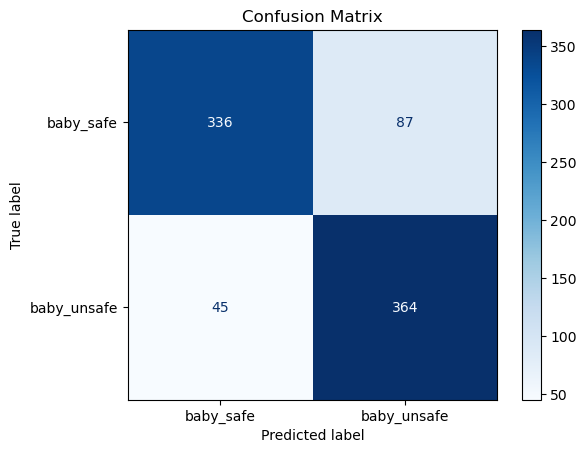

In [68]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)
clf.XGBC(shortAnalysis=True)

Precision at different k:-----------------------------------------------------------------


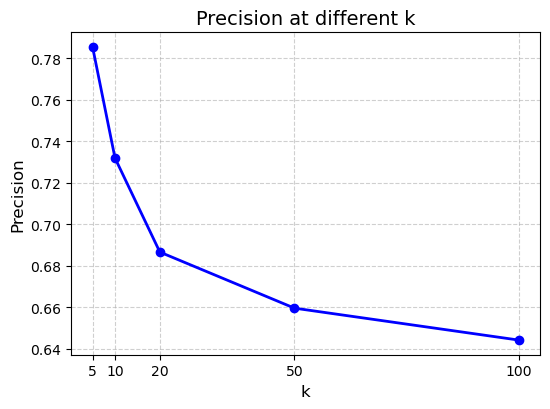


Recall at R-------------------------------------------------------------------------------
0.5773441733389294

Silhouette score--------------------------------------------------------------------------


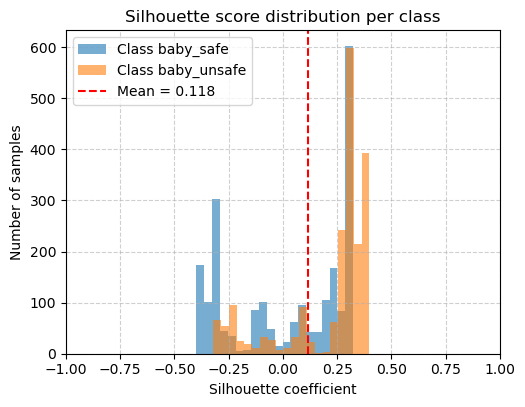

Silhouette score (euclidean): 0.118

Embeddings distributions------------------------------------------------------------------


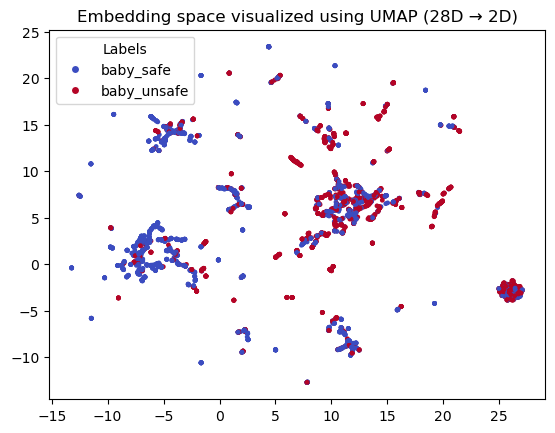

In [69]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

# Face and keypoints, pre data agumentation

In [70]:
%load_ext autoreload
%autoreload 2

import ipynbname
import torch
import os
import warnings
import numpy as np
from xgboost import XGBClassifier
from libraries.classifier_utils import *
from libraries.embeddings_utils import *
from libraries.EmbeddingNet_utils import *
from libraries.retrieval_utils import *


project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe = f"{project_dir}/models/1.pe_weights/best.pt"

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cpu


In [71]:
emb_builder = EmbeddingBuilder(model_path_fd, image_dataset_path, "load", weights_path_pe= model_path_pe)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


In [75]:
embeddings = emb_builder.create_embedding(flags=True, positions=True, positions_normalized=True, geometric_info=True)
embeddings.head()


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------


,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.439989,-0.263087,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,0.346853
1,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.660987,-0.129512,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,1.162193
2,1.149049,1.804407,1.283247,1.432782,1.563738,1.368673,2.300375,1.847780,1.671078,1.412573,...,0.901115,0.900924,1.777158,1.903692,1.509999,1.463409,1.551500,2.054097,-0.199977,0.375414
3,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.148581,-2.766325,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,-0.274908
4,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.000795,-2.481945,-0.552684,-0.542341,-0.647775,-0.641609,-0.623171,-0.514818,-0.325930,-0.083555



Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.93      0.79      0.86       437
 baby_unsafe       0.80      0.94      0.86       395

    accuracy                           0.86       832
   macro avg       0.87      0.86      0.86       832
weighted avg       0.87      0.86      0.86       832

Confusion matrix---------------------------------------


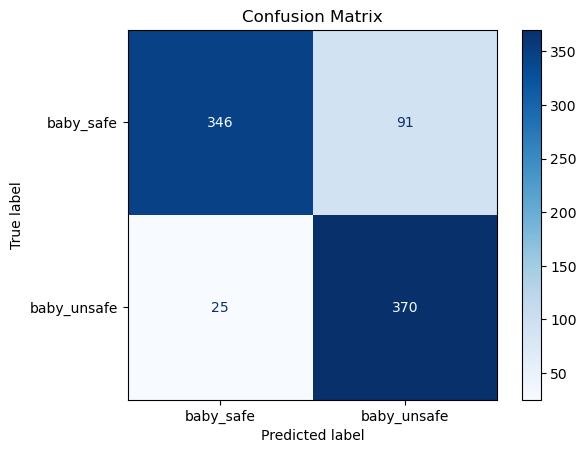

In [76]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)
clf.XGBC(shortAnalysis=True)

Precision at different k:-----------------------------------------------------------------


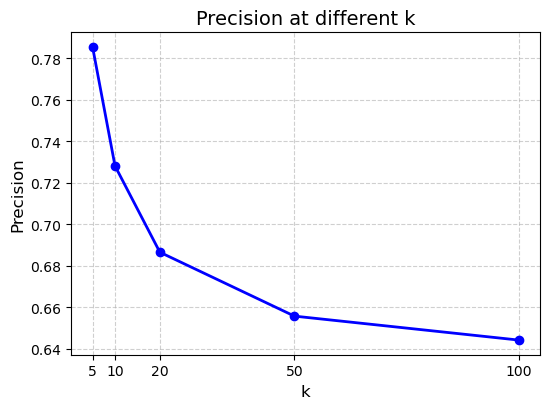


Recall at R-------------------------------------------------------------------------------
0.5775176701325307

Silhouette score--------------------------------------------------------------------------


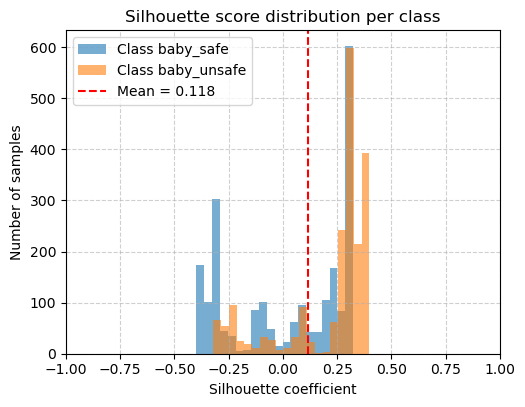

Silhouette score (euclidean): 0.118

Embeddings distributions------------------------------------------------------------------


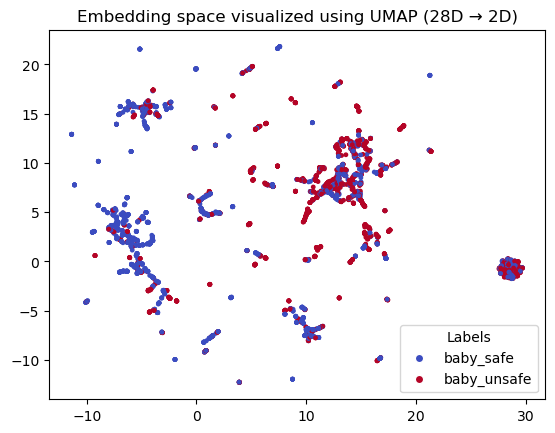

In [77]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

# Face and keypoints

In [78]:
%load_ext autoreload
%autoreload 2

import ipynbname
import torch
import os
import warnings
import numpy as np
from xgboost import XGBClassifier
from libraries.classifier_utils import *
from libraries.embeddings_utils import *
from libraries.EmbeddingNet_utils import *
from libraries.retrieval_utils import *


project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe = f"{project_dir}/models/2.pe_weights/best.pt"

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cpu


In [79]:
emb_builder = EmbeddingBuilder(model_path_fd, image_dataset_path, "load",weights_path_pe=model_path_pe)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


In [80]:
embeddings = emb_builder.create_embedding(flags=True,positions=True, positions_normalized=True, geometric_info=True,k_positions_normalized=True ,k_geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

In [81]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,elbow_shoulder_hip_left,shoulder_elbow_wrist_right,shoulder_elbow_wrist_left,shoulder_hip_knee_right,shoulder_hip_knee_left,hip_knee_ankle_right,hip_knee_ankle_left,shoulders_line_inclination,hips_line_inclination,torsion
0,1.149049,1.804407,1.283247,1.432782,0.744004,1.171259,1.266177,2.077055,0.889389,1.448553,...,-0.039226,0.383192,1.333039,-1.560886,-0.279976,-0.757539,-0.309450,0.762444,0.771932,-0.178298
1,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.312096,-0.441721,-0.310077,-0.660085,-0.007140,-0.642934,0.846223,0.826658,0.726091,0.063336
2,1.149049,1.804407,1.283247,1.432782,1.144892,1.525461,1.977592,2.250430,1.365611,1.633352,...,-0.766569,0.584658,-0.077770,-0.747222,-1.877684,-1.091977,-0.251775,-2.130845,-2.064125,0.153427
3,1.149049,1.804407,1.283247,1.432782,1.030433,1.629509,1.383516,2.332998,0.999428,1.723035,...,-0.321757,0.728416,1.578343,0.772588,1.022744,-1.544667,0.027959,-0.343697,-0.365684,-0.327219
4,-0.870285,-0.554199,-0.779273,-0.697943,-0.848735,-0.849216,-0.543968,-0.543508,-0.763265,-0.763640,...,-0.260608,-0.542733,-0.279691,0.132038,-0.155015,-0.407035,0.766075,0.024762,-0.004783,-0.313672



Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.92      0.87      0.89       423
 baby_unsafe       0.87      0.92      0.90       409

    accuracy                           0.89       832
   macro avg       0.90      0.89      0.89       832
weighted avg       0.90      0.89      0.89       832

Confusion matrix---------------------------------------


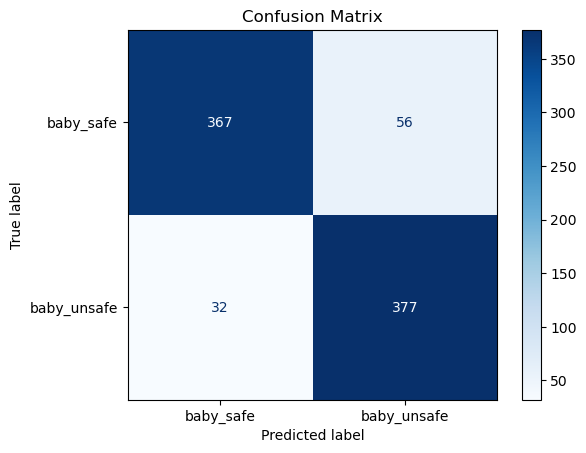

In [82]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)
clf.XGBC(shortAnalysis=True)

Precision at different k:-----------------------------------------------------------------


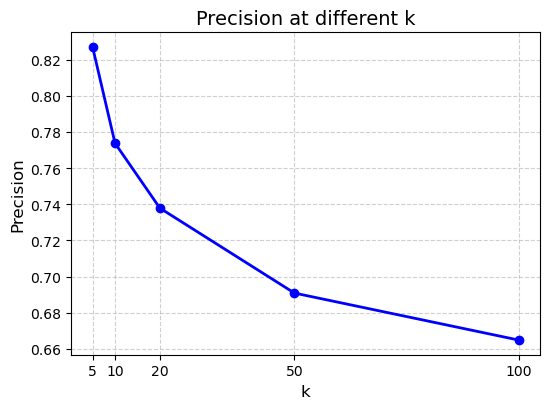


Recall at R-------------------------------------------------------------------------------
0.5500526725742584

Silhouette score--------------------------------------------------------------------------


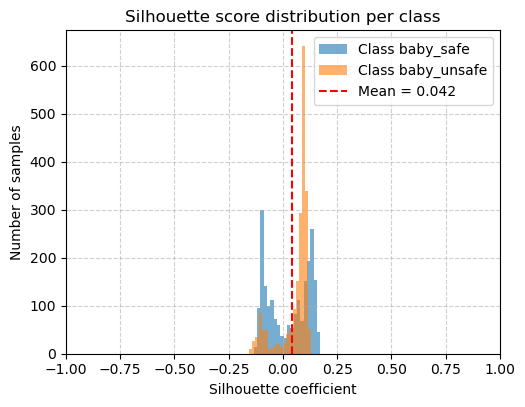

Silhouette score (euclidean): 0.042

Embeddings distributions------------------------------------------------------------------


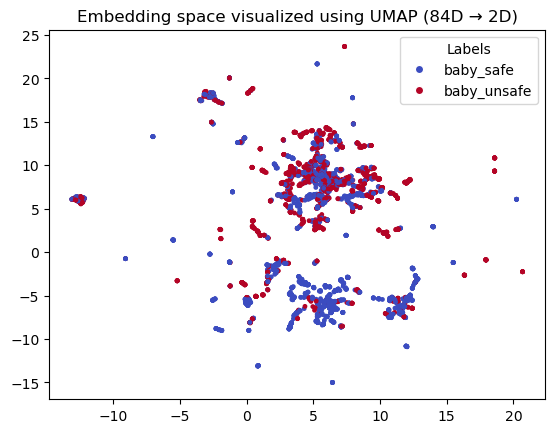

In [84]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

# Face and keypoints and MLP

In [85]:
embeddings = emb_builder.create_embedding(flags=True,positions=True, positions_normalized=True, geometric_info=True,k_positions_normalized=True ,k_geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

In [86]:
dataset = EmbeddingDataset(embeddings.to_numpy(),emb_builder.y,device=device)
model = dataset.train_embeddings(embed_dim=32, epochs=50, batch_size=128, lr=1e-3,verbose=False,weight_decay=1e-7,dropout_rate=0.05)

embeddings_new = dataset.extract_embeddings(model)
embeddings_new= pd.DataFrame(embeddings_new.to_numpy(), columns=[f"f_{i}" for i in range(embeddings_new.shape[1])])


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.95      0.94      0.94       423
 baby_unsafe       0.94      0.95      0.94       409

    accuracy                           0.94       832
   macro avg       0.94      0.94      0.94       832
weighted avg       0.94      0.94      0.94       832

Confusion matrix---------------------------------------


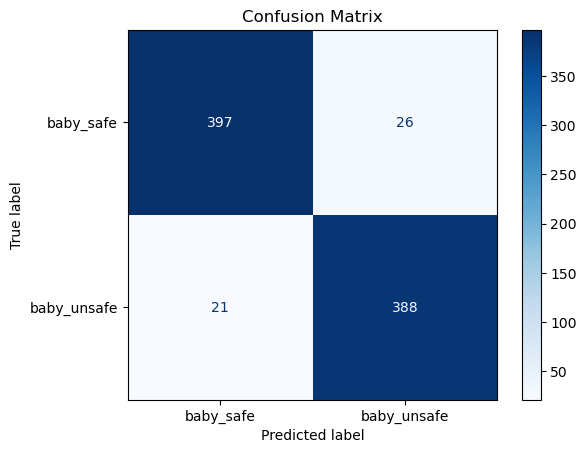

In [87]:
clf = Classifier(embeddings_new, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)
clf.XGBC(shortAnalysis=True)

Precision at different k:-----------------------------------------------------------------


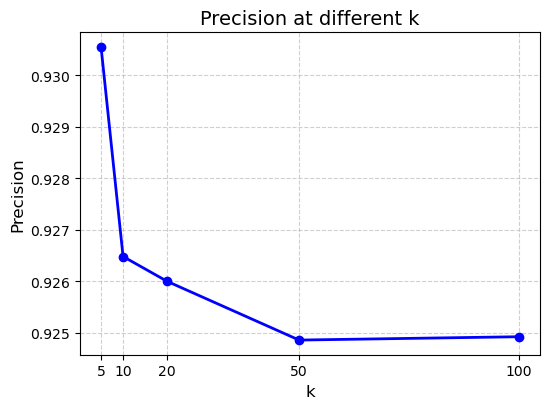


Recall at R-------------------------------------------------------------------------------
0.8818952368776819

Silhouette score--------------------------------------------------------------------------


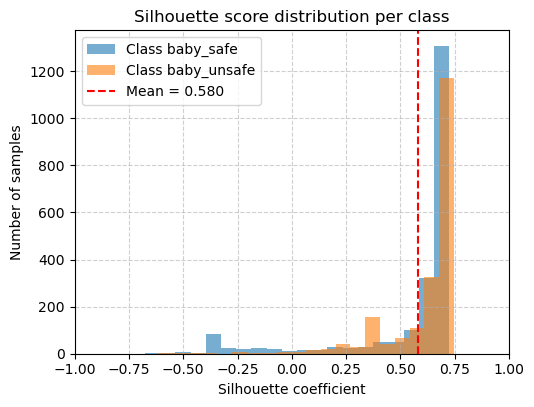

Silhouette score (euclidean): 0.580

Embeddings distributions------------------------------------------------------------------


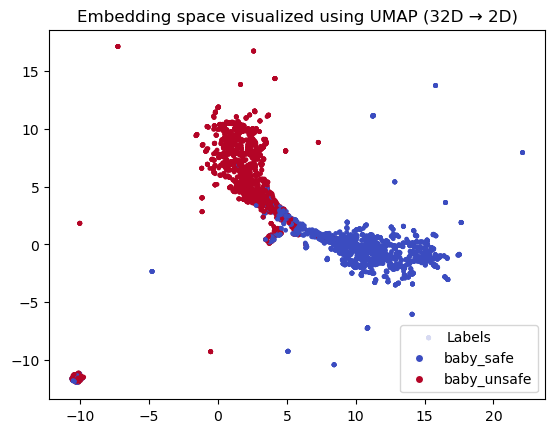

In [88]:
ret = ImageRetrieval(embeddings_new, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

In [ ]:
0from libraries.file_manager_utils import *
save_as_pdf(ipynbname.path())